# Importando Dados

Importando os dados via Kaggle API

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sunilthite/cat-or-dog-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1


In [5]:
path

'/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1'

# Código

In [9]:
import numpy as np
import pandas as pd
import os


for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# os.listdir(path + '/Train/Cat')
# os.listdir(path + '/Train/Dog')

A saída de streaming foi truncada nas últimas 5000 linhas.
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.4849.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.1791.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.8345.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.9423.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.9587.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.5959.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.219.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.6198.jpg
/root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classifica

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np

In [11]:
DOG_TRAIN_PATH = path + '/Train/Dog'
CAT_TRAIN_PATH = path + '/Train/Cat'

DOG_TEST_PATH = path + '/Test/Dog'
CAT_TEST_PATH = path + '/Test/Cat'


print('\n Train paths')
print(f'Dog: {DOG_TRAIN_PATH}')
print(f'Cat: {CAT_TRAIN_PATH}')

print('\n Testing paths:')
print(f'Dog: {DOG_TEST_PATH}')
print(f'Cat: {CAT_TEST_PATH}')


 Train paths
Dog: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog
Cat: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Cat

 Testing paths:
Dog: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Dog
Cat: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Cat


In [12]:
print('\n Number of training images:')
print(f'Dog: {len(os.listdir(DOG_TRAIN_PATH))}')
print(f'Cat: {len(os.listdir(CAT_TRAIN_PATH))}')

print('\n Number of testing images:')
print(f'Dog: {len(os.listdir(DOG_TEST_PATH))}')
print(f'Cat: {len(os.listdir(CAT_TEST_PATH))}')


 Number of training images:
Dog: 11827
Cat: 11823

 Number of testing images:
Dog: 1919
Cat: 1944


In [13]:
from PIL import Image

def get_image_shape_pil(directory):
    image_shapes = []
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png')):
            image_path = os.path.join(directory, filename)
            with Image.open(image_path) as img:
                image_shapes.append(img.size)
    return image_shapes

dog_test_image_shape = get_image_shape_pil(DOG_TEST_PATH)

print(f'Shapes of cat images in the test dataset: \n{dog_test_image_shape}')

Shapes of cat images in the test dataset: 
[(500, 374), (500, 374), (481, 279), (483, 323), (421, 499), (499, 375), (500, 374), (499, 375), (500, 329), (500, 374), (334, 391), (500, 332), (374, 500), (350, 261), (499, 375), (227, 182), (366, 351), (500, 334), (499, 415), (259, 172), (500, 374), (499, 375), (500, 445), (499, 375), (499, 375), (350, 354), (185, 276), (394, 402), (441, 350), (358, 499), (500, 374), (499, 378), (347, 297), (296, 499), (249, 311), (179, 251), (274, 268), (499, 375), (499, 375), (431, 411), (448, 335), (480, 359), (282, 447), (336, 499), (319, 480), (500, 320), (307, 341), (499, 375), (500, 333), (360, 336), (318, 239), (266, 399), (499, 358), (456, 500), (499, 375), (500, 374), (187, 155), (499, 333), (300, 360), (319, 479), (296, 293), (499, 375), (412, 499), (337, 500), (500, 365), (350, 476), (350, 232), (500, 374), (499, 375), (499, 407), (492, 500), (299, 287), (383, 288), (475, 430), (492, 500), (270, 292), (500, 374), (266, 298), (499, 448), (499, 37

In [20]:
def get_files_and_labels(directory, label):
    file_paths = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_paths.append(os.path.join(directory, filename))
            labels.append(label)  # Assign label for each image
    return file_paths, labels

# Get file paths and labels for training data
dog_train_paths, dog_train_labels = get_files_and_labels(DOG_TRAIN_PATH, 1)  # Assign label 1 for dog
cat_train_paths, cat_train_labels = get_files_and_labels(CAT_TRAIN_PATH, 0)  # Assign label 0 for cat

# Combine file paths and labels for both cats and dogs
train_paths = dog_train_paths + cat_train_paths
train_labels = dog_train_labels + cat_train_labels

# Convert lists to numpy arrays
train_paths = np.array(train_paths)
train_labels = np.array(train_labels)

# Check the combined dataset size
print(f'Combined Training Data Size: {len(train_paths)}')

Combined Training Data Size: 23650


In [21]:
# shuffling data
random_indices = np.random.permutation(len(train_paths))
train_paths = train_paths[random_indices]
train_labels = train_labels[random_indices]

print(f'Combined Training Data Size (Amount):{len(train_paths)}')

Combined Training Data Size (Amount):23650


In [23]:
for i in range(10):
    print(f'Path: {train_paths[i]} --------------  Label: {train_labels[i]}')

Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.5956.jpg --------------  Label: 1
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Cat/cat.366.jpg --------------  Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Cat/cat.10089.jpg --------------  Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Cat/cat.639.jpg --------------  Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Dog/dog.4614.jpg --------------  Label: 1
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Cat/cat.9058.jpg --------------  Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Train/Cat/cat.695.jpg --------------  Label: 0
Path: /root/.cache/kag

In [27]:
#Define the paths to the testing data for cats and dogs
DOG_TEST_PATH = os.path.join(path, 'Test/Dog')
CAT_TEST_PATH = os.path.join(path, 'Test/Cat')

# Get file paths and labels for testing data
dog_test_paths, dog_test_labels = get_files_and_labels(DOG_TEST_PATH, 1)  # Assign label 1 for dog
cat_test_paths, cat_test_labels = get_files_and_labels(CAT_TEST_PATH, 0)  # Assign label 0 for cat

# Combine file paths and labels for both cats and dogs
test_paths = dog_test_paths + cat_test_paths
test_labels = dog_test_labels + cat_test_labels

# Convert lists to numpy arrays
test_paths = np.array(test_paths)
test_labels = np.array(test_labels)

# Shuffle the data (if needed)
random_indices = np.random.permutation(len(test_paths))
test_paths = test_paths[random_indices]
test_labels = test_labels[random_indices]

# Check the combined dataset size
print(f'Combined Testing Data Size: {len(test_paths)}')

Combined Testing Data Size: 3863


In [28]:
for i in range(10):
    print(f'Path: {test_paths[i]} Label: {test_labels[i]}')

Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Dog/dog.6278.jpg Label: 1
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Cat/cat.6141.jpg Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Dog/dog.9630.jpg Label: 1
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Cat/cat.8295.jpg Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Dog/dog.11831.jpg Label: 1
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Cat/cat.4601.jpg Label: 0
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Dog/dog.8567.jpg Label: 1
Path: /root/.cache/kagglehub/datasets/sunilthite/cat-or-dog-image-classification/versions/1/Test/Cat/cat.6388.jpg Label: 0
Path: /root/.ca

Label: 0


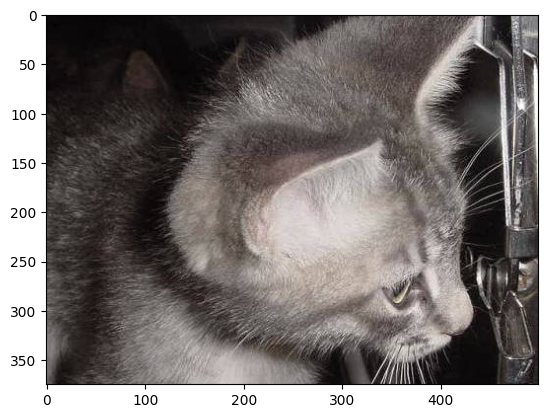

In [33]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

id_train = random.randint(0,len(train_paths))
img = mpimg.imread(train_paths[id_train])

print(f'Label: {train_labels[id_train]}')

imgplt = plt.imshow(img)

# Preprocessamento

In [1]:
train_paths

NameError: name 'train_paths' is not defined

In [ ]:
import tensorflow as tf

def preprocess_and_resize_images(image_paths, labels, target_size):
    """
    Preprocesses and resizes a batch of images.

    Args:
    - image_paths: List of file paths to the images.
    - labels: List of labels corresponding to the images.
    - target_size: Tuple specifying the target size for the images (height, width).

    Returns:
    - A tuple containing preprocessed and resized images and their labels.
    """
    images = []
    for path in image_paths:
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels = 3)  # Decode JPEG image with 3 channels (RGB)
        img = tf.image.resize(img, target_size)
        images.append(img)
    images = tf.stack(images)

    return images.numpy(), labels

# Define the target size for resizing
target_size = (150, 150)

# Preprocess and resize the images in the combined testing dataset
train_images_resized,train_labels_resized = preprocess_and_resize_images(train_paths, train_labels, target_size)
test_images_resized, test_labels_resized = preprocess_and_resize_images(test_paths, test_labels, target_size)